[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


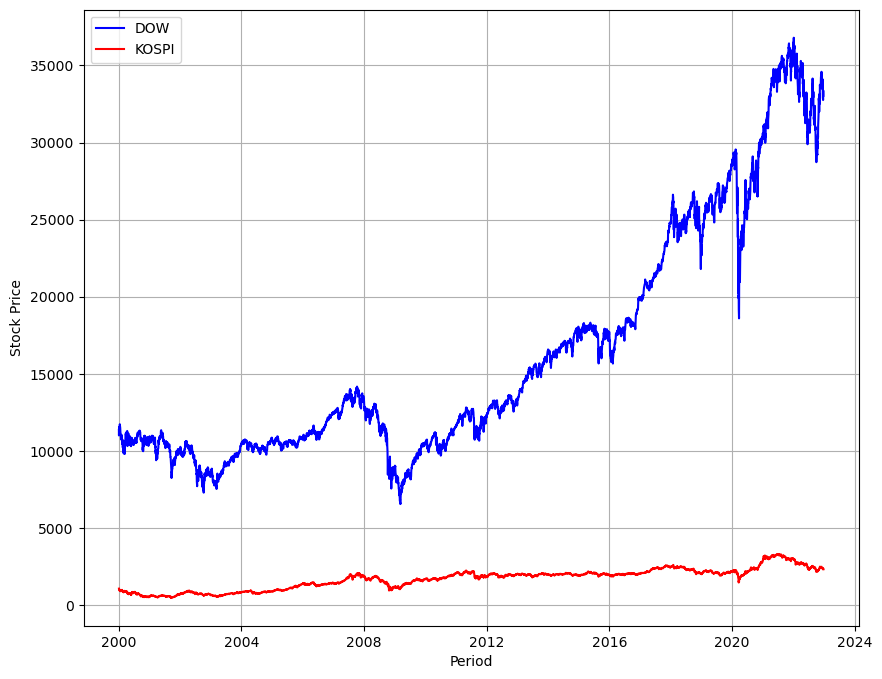

In [4]:
# KOSPI & 다우존스 지수 단순 비교
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', start='2000-01-01')
# 코스피 지수 가져오기
kospi = pdr.get_data_yahoo('^KS11', start='2000-01-01')

# 종가 비교 그래프 그리기
plt.figure(figsize=(10,8))
plt.plot(dow.index, dow.Close, 'b', label='DOW')
plt.plot(kospi.index, kospi.Close, 'r', label='KOSPI')
plt.grid(True)
plt.xlabel('Period')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


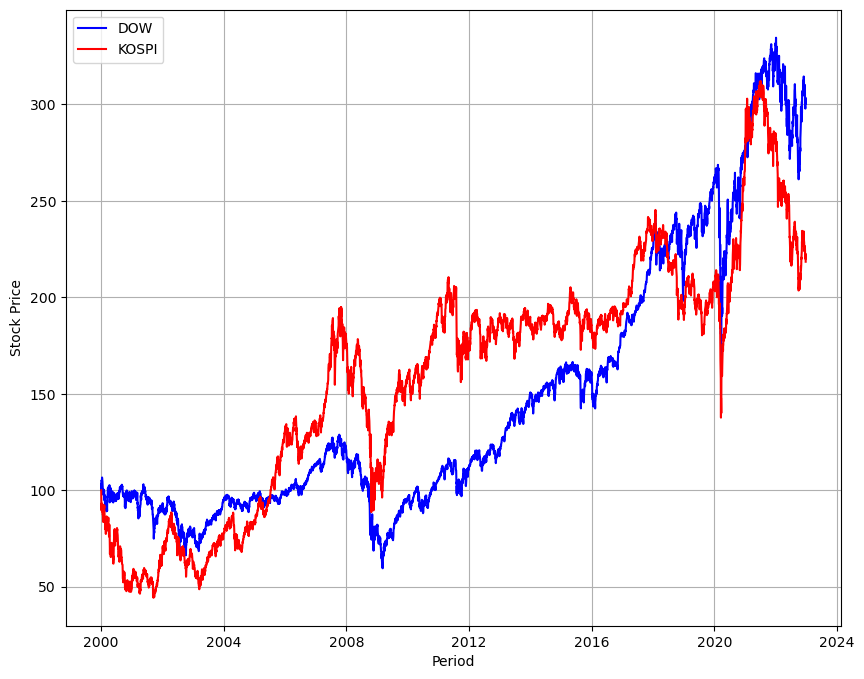

In [7]:
# KOSPI & 다우존스 지수 단순 비교
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

yf.pdr_override()

# 다우존스 지수 가져오기
dow = pdr.get_data_yahoo('^DJI', start='2000-01-01')
# 코스피 지수 가져오기
kospi = pdr.get_data_yahoo('^KS11', start='2000-01-01')

# 지수화
dow_d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
kospi_k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100


# 종가 비교 그래프 그리기
plt.figure(figsize=(10,8))
plt.plot(dow_d.index, dow_d, 'b', label='DOW')
plt.plot(kospi_k.index, kospi_k, 'r', label='KOSPI')
plt.grid(True)
plt.xlabel('Period')
plt.ylabel('Stock Price')
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\kwonk\AppData\Local\Temp\ipykernel_45796\2628632028.py:27: UserWarning: Legend does not support 'D' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('DOW X KOSPI', regr_line)
C:\Users\kwonk\AppData\Local\Temp\ipykernel_45796\2628632028.py:27: UserWarning: Legend does not support 'O' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('DOW X KOSPI', regr_line)
C:\Users\kwonk\AppData\Local\Temp\ipykernel_45796\2628632028.py:27: UserWarning: Legend does not support 'W' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('DOW X KOSPI', regr_line)
C:\Users\kwonk\AppData\Local\Temp\ipyker

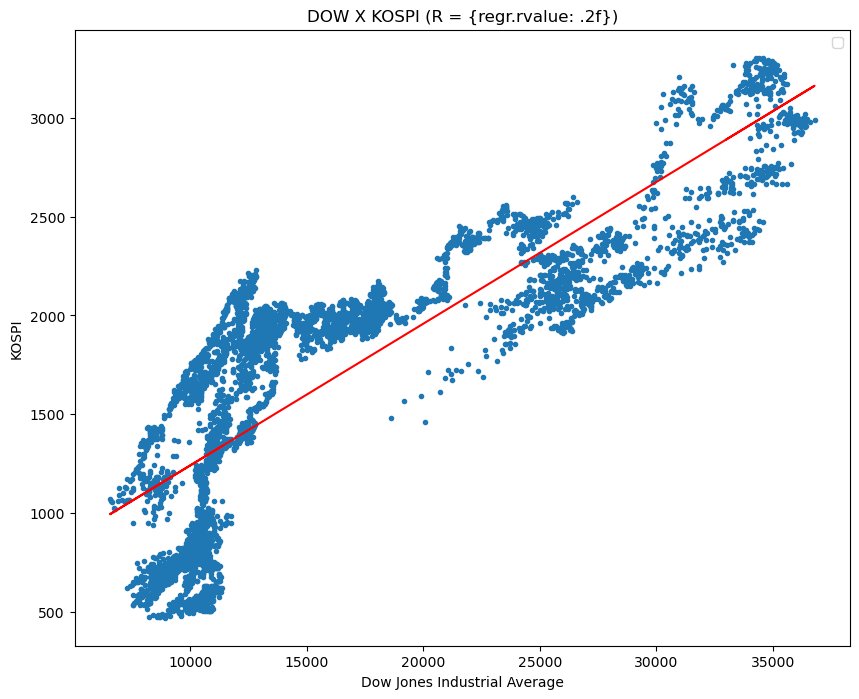

In [16]:
# KOSPI & 다우존스 지수 단순 비교
import pandas as pd
import yfinance as yf
from scipy import stats
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

yf.pdr_override()

# 다우존스 지수 가져오기
dow = pdr.get_data_yahoo('^DJI', start='2000-01-01')
# 코스피 지수 가져오기
kospi = pdr.get_data_yahoo('^KS11', start='2000-01-01')

# kospi & 다우존스 dataframe 생성
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI':kospi['Close']})
df = df.fillna(method = 'ffill') # 앞의 데이터로 nan 채움
df = df.fillna(method = 'bfill') # 뒤의 데이터로 nan 채움

regr = stats.linregress(df['DOW'], df['KOSPI'])
regr_line = f'Y = {regr.slope : 2f} * X + {regr.intercept : 2f}'

# 종가 비교 그래프 그리기
plt.figure(figsize=(10,8))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.plot(df.DOW, regr.slope * df.DOW + regr.intercept, 'r')
plt.legend('DOW X KOSPI', regr_line)
plt.title('DOW X KOSPI (R = {regr.rvalue: .2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()



In [15]:
## KOSPI VS DOW 지수 상관계수 구하기
# R-Value
r_value = df['DOW'].corr(df['KOSPI'])

# 결정계수 r2 score
r2 = r_value ** 2
r2


0.6773932735619669

In [ ]:
# 종가 비교 그래프 그리기
plt.figure(figsize=(10,8))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.grid(True)
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.legend(loc='best')
plt.show()